In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('bread_basket.csv')
print('DataFrame shape : ', data.shape) # banyak data
data.head()

DataFrame shape :  (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [4]:
# mengatur untuk format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [5]:
# untuk mengetahui data tersebut berjenis apa
# untuk memberikan informasi tentang jenis data yang ada dalam kolom tersebut.
print(data["date_time"].dtype)

datetime64[ns]


In [6]:
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour
data.head()

# Dengan mengeksekusi kode ini, Anda akan menambahkan tiga kolom baru ("month", "day", dan "hour") ke dalam objek data yang sudah ada, dan kolom-kolom tersebut akan berisi informasi yang relevan berdasarkan nilai tanggal dan waktu yang ada di kolom "date_time".

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


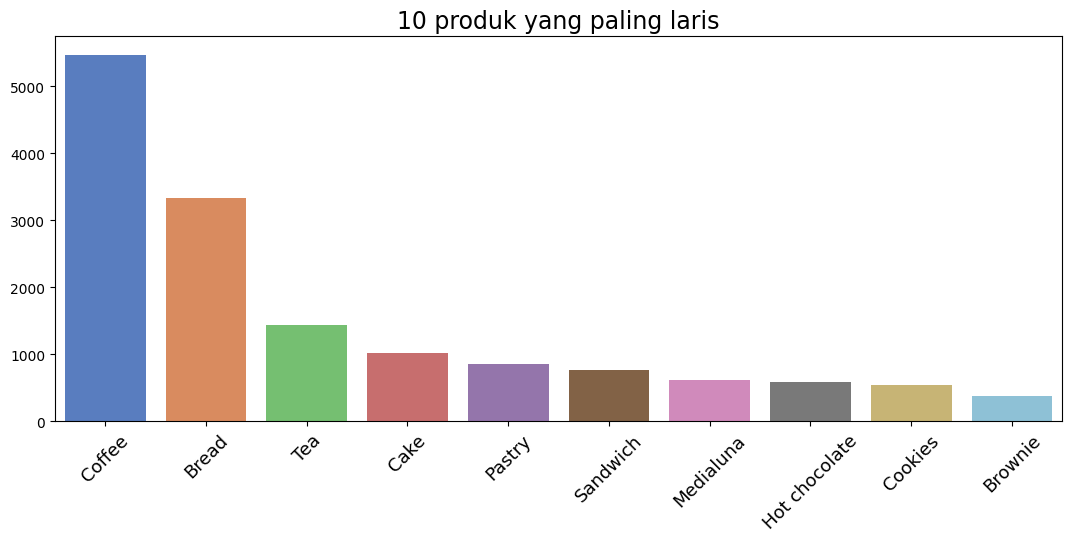

In [7]:
 # menampilkan 10 item paling laris
 
 plt.figure(figsize=(13,5))
 sns.set_palette("muted")

 sns.barplot(x=data['Item'].value_counts()[:10].index,
             y=data['Item'].value_counts()[:10].values)

plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13, rotation=45)
plt.title('10 produk yang paling laris', size=17)

plt.show()

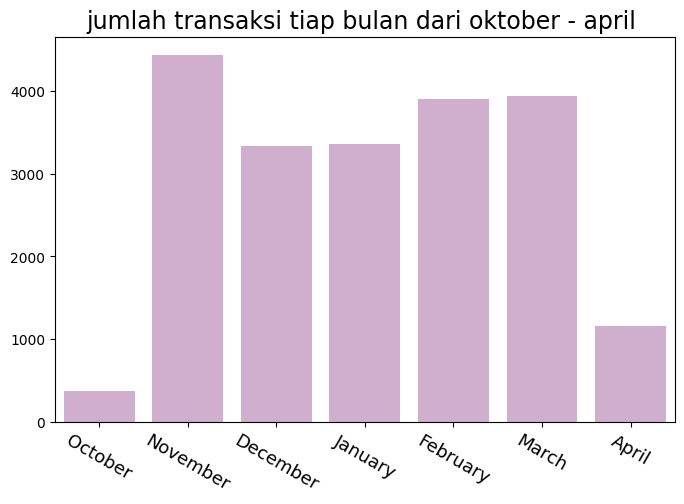

In [8]:
# transaksi tiap bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color='#D5AAD3')

plt.xticks(size=13, rotation=-30)
plt.title('jumlah transaksi tiap bulan dari oktober - april ', size=17)

plt.show()


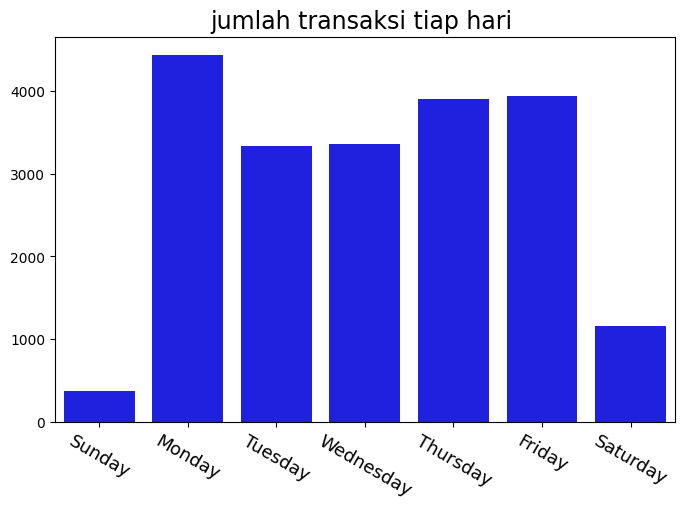

In [9]:
# transaksi tiap hari

data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
    y = data_perbulan.values, color='blue')

plt.xticks(size=13, rotation=-30)
plt.title('jumlah transaksi tiap hari ', size=17)

plt.show()

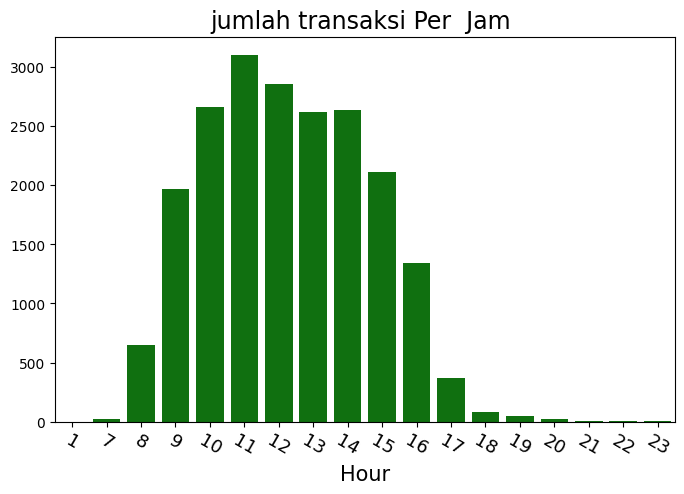

In [10]:
# transaksi tiap jam

data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color='green')

plt.xlabel("Hour", size = 15)
plt.xticks(size=13, rotation=-30)
plt.title('jumlah transaksi Per  Jam ', size=17)

plt.show()

## Preparation data

In [11]:
data['Item'] = data['Item'].apply(lambda item: item.lower())
# untuk mengubah value dari kolom item menjadi huruf kecil semua

In [12]:
data['Item'] = data['Item'].apply(lambda item: item.strip())
# menghilangkan spasi dari setiap kata pada value item

In [13]:
data = data[['Transaction', 'Item']].copy()
# langkah untuk membuat salinan DataFrame data dengan hanya mempertahankan kolom 'Transaction' dan 'Item' dalam salinannya.

data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


# Library Apriory

In [14]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlxtend in c:\users\davar\appdata\local\programs\python\python311\lib\site-packages (0.22.0)




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from mlxtend.frequent_patterns import association_rules, apriori

In [16]:
item_count = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='count')
# untuk mengetahui beberapa item yang di beli saat 1 transaksi dilakukan

item_count.head(10)

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [17]:
# membuat pivot

item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='count', aggfunc='sum').fillna(0)
print(' ukuran dataset : ', item_count_pivot.shape)
item_count_pivot.head()

 ukuran dataset :  (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 1 :
        return 1


item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(' Ukuran dataset : ', item_count_pivot.shape)
print(' Jumlah Transaksi : ', item_count_pivot.shape[0])
print(' Jumlah Item / produk : ', item_count_pivot.shape[1])


 Ukuran dataset :  (9465, 94)
 Jumlah Transaksi :  9465
 Jumlah Item / produk :  94


In [21]:
# masuk ke algoritmanya apriori
support = 0.01 # penentuan nilai support ini bisa menggunakan rumus ( jumlah item / jumlah transaksi)
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

c:\Users\davar\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(coffee, cake)"


In [22]:
# mencari lift ratio

metric = 'lift'
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(10)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
19,(medialuna),(coffee),0.035182,0.569231,1.189878
22,(pastry),(coffee),0.047544,0.552147,1.154168
1,(alfajores),(coffee),0.019651,0.540698,1.130235
16,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
7,(cake),(coffee),0.054728,0.526958,1.101515
26,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723


In [23]:
# penjelasan metode apriori
# Support dan Confidence adalah dua parameter kritis dalam metode Apriori. Support mengukur seberapa sering suatu itemset muncul dalam data. Confidence, di sisi lain, mengukur seberapa sering aturan asosiasi berlaku dalam data. Anda harus menentukan threshold (ambang batas) untuk kedua parameter ini untuk menghasilkan itemset atau aturan yang relevan dengan analisis Anda.